<a href="https://colab.research.google.com/github/Srijan-Rai/Playstore/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [73]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
# Importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [75]:
path1 = "/MyDrive/Colab Notebooks/Play Store App Review Analysis/Play Store Data.csv"
playstore_Df = pd.read_csv("/content/drive"+path1)

In [76]:
path2 = "/MyDrive/Colab Notebooks/Play Store App Review Analysis/User Reviews.csv"
reviews_Df = pd.read_csv("/content/drive"+path2)

In [77]:
playstore_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [78]:
reviews_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [79]:
# Dropping Repeated Apps from Playstore Dataframe
playstore_Df.drop_duplicates(subset="App",keep="last",inplace=True)
playstore_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [80]:
playstore_Df.describe

<bound method NDFrame.describe of                                                      App  ...         Android Ver
0         Photo Editor & Candy Camera & Grid & ScrapBook  ...        4.0.3 and up
2      U Launcher Lite – FREE Live Cool Themes, Hide ...  ...        4.0.3 and up
3                                  Sketch - Draw & Paint  ...          4.2 and up
4                  Pixel Draw - Number Art Coloring Book  ...          4.4 and up
5                             Paper flowers instructions  ...          2.3 and up
...                                                  ...  ...                 ...
10836                                   Sya9a Maroc - FR  ...          4.1 and up
10837                   Fr. Mike Schmitz Audio Teachings  ...          4.1 and up
10838                             Parkinson Exercices FR  ...          2.2 and up
10839                      The SCP Foundation DB fr nn5n  ...  Varies with device
10840      iHoroscope - 2018 Daily Horoscope & Astrology  ...  V

In [81]:
# Maximum Rated app is an outlier
playstore_Df.loc[playstore_Df["Rating"].idxmax(),:]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

Rating for Apps cannot be greater than 5.0

In [82]:
#Removing app with rating as 19 from the dataframe
playstore_Df = playstore_Df[playstore_Df["Rating"]!=19]
reviews_Df = reviews_Df[reviews_Df['App']!="Life Made WI-Fi Touchscreen Photo Frame"]

In [83]:
#Head of the playstore dataframe
playstore_Df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [84]:
#Head of the reviews dataframe
reviews_Df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


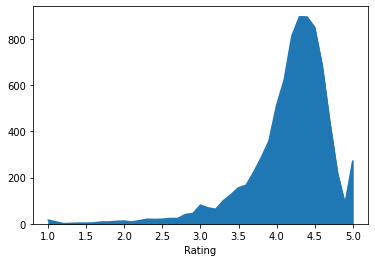

In [85]:
playstore_Df.groupby("Rating")['App'].count().plot(kind = "area")

Median imputation in which the missing values are replaced with the median value of the entire feature column.When the data is skewed, it is good to consider using the median value for replacing the missing values. 

In [86]:
playstore_Df["Rating"].median()

4.3

In [87]:
# Replacing NAN Rated Apps with median values
playstore_Df.loc[playstore_Df["Rating"].isna(),"Rating"] = playstore_Df["Rating"].median()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [88]:
playstore_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [89]:
#Converting Dtype of Installs to float
playstore_Df['Installs']=playstore_Df['Installs'].apply(lambda x: str(x).replace("+",'') if "+" in str(x) else x)
playstore_Df['Installs']=playstore_Df['Installs'].apply(lambda x: str(x).replace(",",'')if "," in str(x) else x)
playstore_Df['Installs'] = playstore_Df['Installs'].apply(lambda x : float(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [90]:
#Converting Dtype of Size to float
playstore_Df['Size']=playstore_Df['Size'].apply(lambda x: str(x).replace("M",'')if "M" in str(x) else x)
playstore_Df['Size']=playstore_Df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str( x) else x)
playstore_Df['Size'] = playstore_Df['Size'].replace("Varies with device",np.nan)
playstore_Df['Size'] = playstore_Df['Size'].apply(lambda x : float(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [91]:
# Converting Dtype of Reviews to float
playstore_Df["Reviews"] = playstore_Df["Reviews"].apply(lambda x : float(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [92]:
# Converting Dtype of Price to float
playstore_Df['Price']=playstore_Df['Price'].apply(lambda x: str(x).replace("$",'')if "$" in str(x) else x)
playstore_Df["Price"] = playstore_Df["Price"].apply(lambda x : float(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [93]:
# Converting Dtype of Last Updated to DateTime
playstore_Df["Last Updated"] = pd.to_datetime(playstore_Df["Last Updated"]).dt.date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [94]:
playstore_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   float64
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   float64
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(5), object(8)
memory usage: 1.0+ MB


In [95]:
playstore_Df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6,50000.0,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up


Data Analysis Based on App Category

Text(0.5, 1.0, 'Installations based on Category')

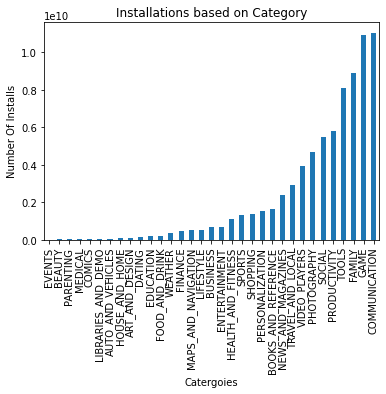

In [96]:
#Installations based on Category 
playstore_Df.groupby("Category")["Installs"].sum().sort_values().plot(kind = "bar")
plt.xlabel("Catergoies")
plt.ylabel("Number Of Installs")
plt.title("Installations based on Category")

Text(0.5, 1.0, 'Number of Apps based on Category')

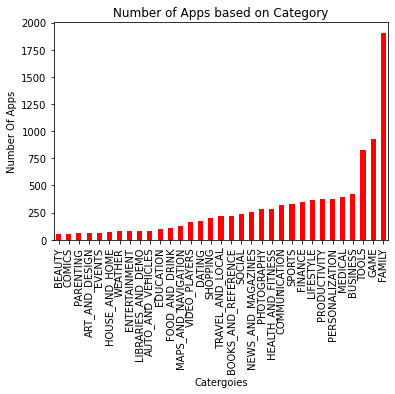

In [97]:
# Apps based on Category
playstore_Df.groupby("Category")["App"].count().sort_values().plot(kind = "bar", color ="red")
plt.xlabel("Catergoies")
plt.ylabel("Number Of Apps")
plt.title("Number of Apps based on Category")

Analyse Data Based on Type of the App

Text(0.5, 1.0, 'Number of paid and free Apps')

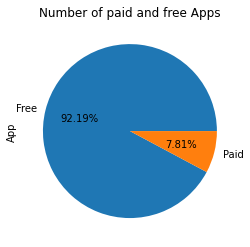

In [98]:
# Obtain number of apps based on its type
playstore_Df.groupby("Type")["App"].count().plot(kind = "pie",autopct="%.2f%%")
plt.title("Number of paid and free Apps")

Text(0.5, 1.0, 'Installs for free and paid apps')

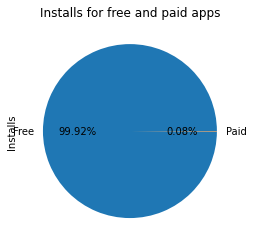

In [99]:
playstore_Df.groupby(['Type'])['Installs'].sum().plot(kind = 'pie',autopct="%.2f%%")
plt.title("Installs for free and paid apps")

Text(0.5, 1.0, 'Average Rating for Free and Paid Apps')

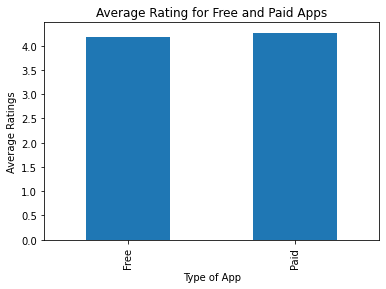

In [100]:
playstore_Df.groupby(['Type'])["Rating"].mean().plot(kind = "bar")
plt.xlabel("Type of App")
plt.ylabel("Average Ratings")
plt.title("Average Rating for Free and Paid Apps")

Top 10 highst installed apps

In [101]:
playstore_Df.groupby("App")["Installs"].sum().sort_values(ascending = False).head(10)

App
Gmail                            1.000000e+09
Google+                          1.000000e+09
Google                           1.000000e+09
Google Drive                     1.000000e+09
Skype - free IM & video calls    1.000000e+09
Google News                      1.000000e+09
Google Photos                    1.000000e+09
Google Play Books                1.000000e+09
Google Play Games                1.000000e+09
Google Play Movies & TV          1.000000e+09
Name: Installs, dtype: float64

Number of installs based on size of the apps

Text(0.5, 1.0, 'Number of installs for various sizes of apps')

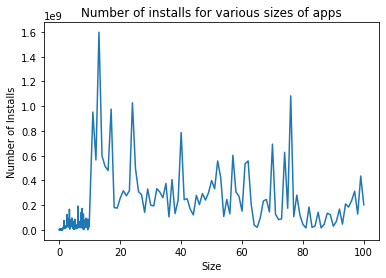

In [102]:
playstore_Df.groupby("Size")["Installs"].sum().plot()
plt.xlabel("Size")
plt.ylabel("Number of Installs")
plt.title("Number of installs for various sizes of apps")

In [103]:
reviews_Df = reviews_Df[~reviews_Df["Translated_Review"].isna()]

In [104]:
subjective = reviews_Df[reviews_Df['Sentiment_Subjectivity']>0.5]
subjective

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
10,10 Best Foods for You,good you.,Positive,0.700000,0.600000
12,10 Best Foods for You,"Thank you! Great app!! Add arthritis, eyes, im...",Positive,0.750000,0.875000
...,...,...,...,...,...
64209,Housing-Real Estate & Property,Awesome app.. But prices date? Awesome app. Gi...,Positive,0.509375,0.511458
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333


In [105]:
subjective.groupby("App")["Translated_Review"].count().sort_values(ascending = False)

App
Angry Birds Classic                                  159
Bowmasters                                           156
Calorie Counter - MyFitnessPal                       136
Helix Jump                                           120
CBS Sports App - Scores, News, Stats & Watch Live    115
                                                    ... 
Dashlane Free Password Manager                         1
Bed Time Fan - White Noise Sleep Sounds                1
DEER HUNTER 2018                                       1
Beauty Makeup Snappy Collage Photo Editor - Lidow      1
Draw In                                                1
Name: Translated_Review, Length: 846, dtype: int64

In [106]:
objective = reviews_Df[reviews_Df['Sentiment_Subjectivity']<=0.5]
objective

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000
...,...,...,...,...,...
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


In [107]:
objective.groupby("App")["Translated_Review"].count().sort_values(ascending = False)

App
Bowmasters                        156
Helix Jump                        153
Candy Crush Saga                  144
Duolingo: Learn Languages Free    138
Garena Free Fire                  124
                                 ... 
Amazon Prime Video                  1
DashClock Widget                    1
Anger of stick 5 : zombie           1
Apartment Decorating Ideas          1
CBS News                            1
Name: Translated_Review, Length: 843, dtype: int64